In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import load_iris

In [34]:
iris=load_iris()
df=pd.DataFrame(data=iris.data , columns = iris.feature_names)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [35]:
df['target']=iris.target

In [36]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
#iloc[axis=0,a`axis=1]
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train,y_train)
X_test=scaler.transform(X_test)

In [40]:
classifier = RandomForestClassifier(n_estimators=100 , random_state=42)
classifier.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_pred=classifier.predict(X_test)

In [42]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


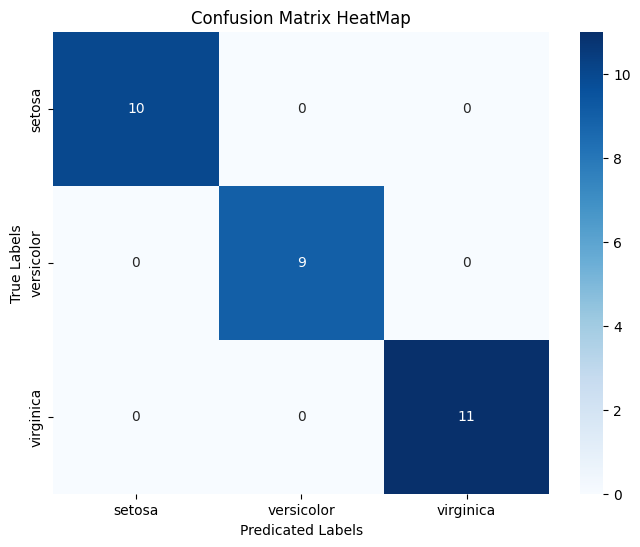

In [48]:
conf=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf,annot=True,xticklabels=iris.target_names,yticklabels=iris.target_names,cmap="Blues")
plt.title("Confusion Matrix HeatMap")
plt.xlabel("Predicated Labels")
plt.ylabel("True Labels")
plt.show()

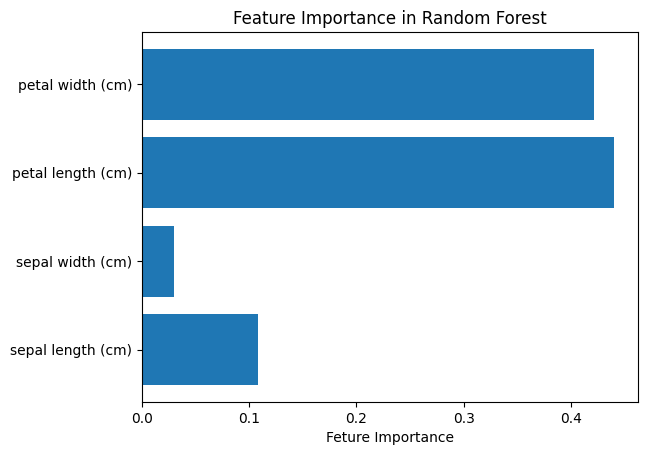

In [50]:
feature_importances = classifier.feature_importances_

plt.barh(iris.feature_names,feature_importances)
plt.xlabel('Feture Importance')
plt.title("Feature Importance in Random Forest")
plt.show()